<a href="https://colab.research.google.com/github/vngeno/HASS-CONSULTING-PROJECT/blob/main/HASS_CONSULTING_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining The Question

##Specifying the Question

Hass Consulting Company is a real estate leader with over 25 years of experience. We have been tasked to study the factors that affect housing prices using given information on real estate properties that was collected over the past few months.

##Understanding the Context

HassConsult Limited was formed in 1992. It offers investment-grade developments all over the City. The developments they offer have been conceptualized by their development team to be high quality assets using a data-driven approach in planning and design, that gears property for high rental returns and an escalated rate of capital growth.

##Metric of Success

We will create a model that will allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

##Experimental Design

Our analysis will take the below flow:

1.)Defining the question

2.)Data Understanding

3.)Data Analysis

4.)Modelling

5.)Conclusion & Recommendation

6.)Challenging the Solution

#Data Preparation

##Reading the Data

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.model_selection import KFold
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading our dataset
df = pd.read_csv('/content/Independent Project Week 7 - house_data.csv')
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


##Data Cleaning

In [3]:
#We'll check for appropriate datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [4]:
#We'll check for the number of rows and columns. 
#There are 21613 rows and 20 columns
df.shape

(21613, 20)

In [5]:
#We'll check for null values
#There are no null/missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
#Checking for duplicate records. There are only 3 records
df.duplicated().sum()

3

In [7]:
#We'll now check for the particular duplicate rows to see if we can drop or keep them. 
#We'll keep the records since they're of different IDs
duplicateRows = df[df.duplicated()]
duplicateRows

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3951,1825069031,550000.0,4,1.75,2410,8447,2.0,0,3,4,8,2060,350,1936,1980,98074,47.6499,-122.088,2520,14789
14983,6308000010,585000.0,3,2.50,2290,5089,2.0,0,0,3,9,2290,0,2001,0,98006,47.5443,-122.172,2290,7984
20054,8648900110,555000.0,3,2.50,1940,3211,2.0,0,0,3,8,1940,0,2009,0,98027,47.5644,-122.093,1880,3078


In [8]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [9]:
df.drop(columns= ['id', 'lat', 'long','sqft_living15','sqft_lot15','grade','condition'], axis=1, inplace=True)
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,3,1.00,1180,5650,1.0,0,0,1180,0,1955,0,98178
1,538000.0,3,2.25,2570,7242,2.0,0,0,2170,400,1951,1991,98125


In [10]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [11]:
df.shape

(21613, 13)

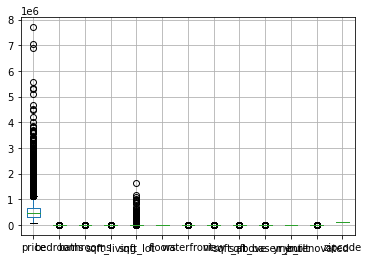

In [12]:
df.boxplot()

In [13]:
#Usinfg IQR to check for detecting outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price            323050.00
bedrooms              1.00
bathrooms             0.75
sqft_living        1123.00
sqft_lot           5648.00
floors                1.00
waterfront            0.00
view                  0.00
sqft_above         1020.00
sqft_basement       560.00
yr_built             46.00
yr_renovated          0.00
zipcode              85.00
dtype: float64


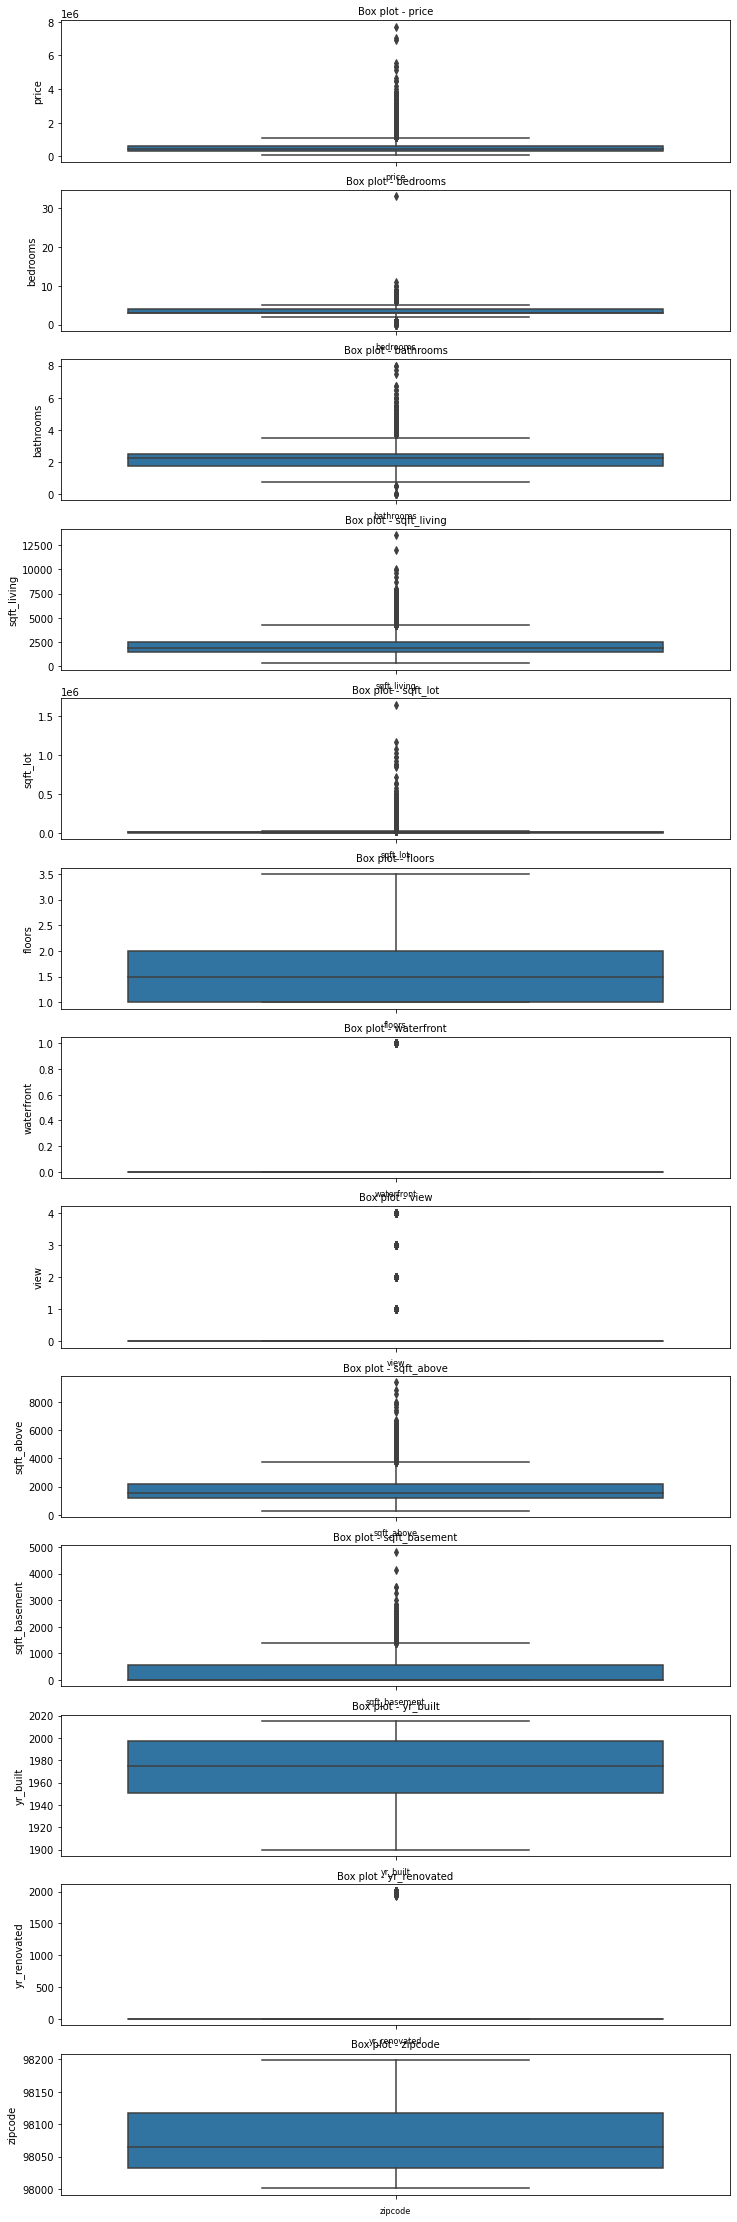

In [14]:
#Loop method to check for outliers visually using a boxplot
col_names = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode']

fig, ax = plt.subplots(len(col_names), figsize= (12,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y=df[col_val], ax= ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

In [15]:
#Removing outliers 
df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(15787, 13)


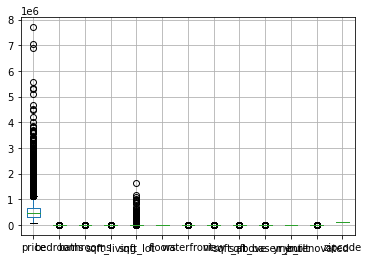

In [16]:
df.boxplot()

#Exploratory Data Analysis

##Univariate Data Analysis

In [17]:
df_out.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

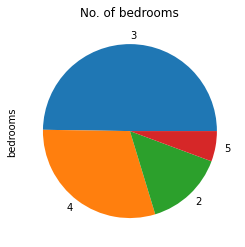

In [18]:
#Most bedrooms were 3 bedroomed properties
df_out['bedrooms'].value_counts().plot(kind='pie')
explode = [0,0.1,0,0]
plt.title('No. of bedrooms');

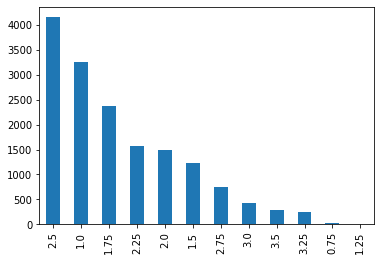

In [19]:
df_out['bathrooms'].value_counts().plot.bar()

In [20]:
#Getting summary statistics for the data
df_out.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
count,1.578700e+04,15787.000000,15787.000000,15787.000000,15787.000000,15787.000000,15787.0,15787.0,15787.000000,15787.000000,15787.000000,15787.0,15787.000000
mean,4.435725e+05,3.265978,1.981045,1837.396655,7156.542218,1.477386,0.0,0.0,1614.131437,223.265218,1972.009438,0.0,98078.774181
std,1.873308e+05,0.775355,0.654978,647.150988,3481.944486,0.546224,0.0,0.0,637.902181,351.362310,29.279205,0.0,53.164541
min,7.800000e+04,2.000000,0.750000,540.000000,520.000000,1.000000,0.0,0.0,480.000000,0.000000,1900.000000,0.0,98001.000000
25%,3.000000e+05,3.000000,1.500000,1350.000000,4800.000000,1.000000,0.0,0.0,1140.000000,0.000000,1952.000000,0.0,98033.000000
50%,4.099000e+05,3.000000,2.000000,1750.000000,7173.000000,1.000000,0.0,0.0,1440.000000,0.000000,1975.000000,0.0,98065.000000
75%,5.513000e+05,4.000000,2.500000,2240.000000,9125.500000,2.000000,0.0,0.0,1960.000000,430.000000,1999.000000,0.0,98118.000000
max,1.120000e+06,5.000000,3.500000,4220.000000,19141.000000,3.500000,0.0,0.0,3740.000000,1400.000000,2015.000000,0.0,98199.000000


In [21]:
print('Skewness of Year: ' +str(df_out.skew()))

Skewness of Year: price            0.825225
bedrooms         0.228537
bathrooms       -0.082451
sqft_living      0.583929
sqft_lot         0.587123
floors           0.730735
waterfront       0.000000
view             0.000000
sqft_above       0.975000
sqft_basement    1.365776
yr_built        -0.470344
yr_renovated     0.000000
zipcode          0.361447
dtype: float64


From the above, with some variables like waterfront and view having a skewness of 0.0 and some like bathrooms having -0.08, generally the data is approximately symettrical.

In [22]:
print('Kurtosis for the dataframe: ' +str(df_out.kurt()))

Kurtosis for the dataframe: price            0.305416
bedrooms        -0.297672
bathrooms       -0.805122
sqft_living     -0.095054
sqft_lot         0.530456
floors          -0.294116
waterfront       0.000000
view             0.000000
sqft_above       0.361766
sqft_basement    0.623242
yr_built        -0.643761
yr_renovated     0.000000
zipcode         -0.910866
dtype: float64


The distribution has a kurtosis of less than 3  it is platykurtic. Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.

##Bivariate Data Analysis

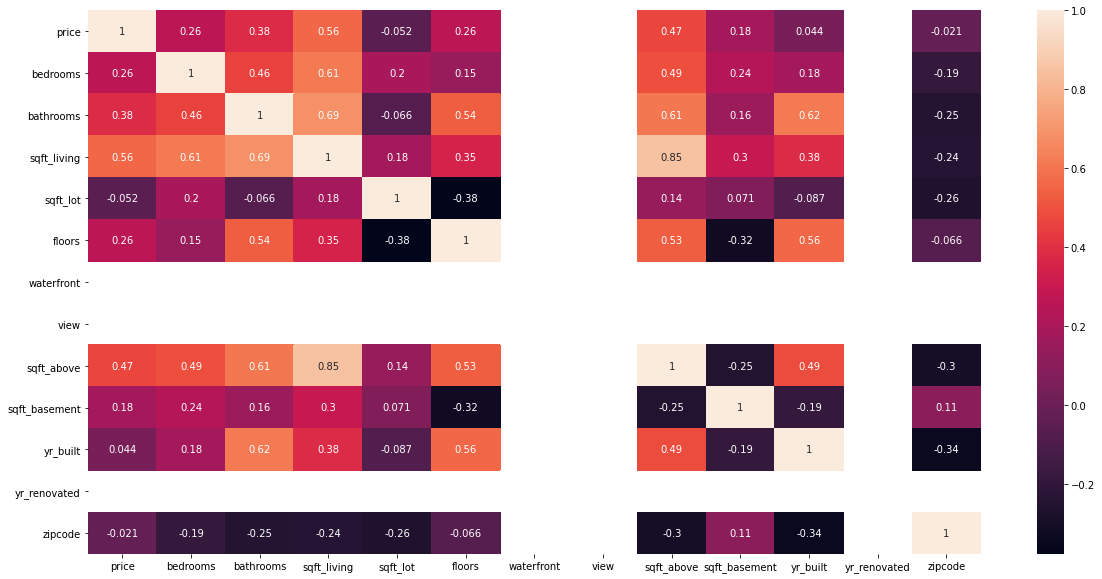

In [23]:
#Pearson's heatmap to check correlation between the variables
corr = df_out.corr() 
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)
plt.show()

##Multivariate Data Analysis

In [24]:
df_out.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

In [25]:
#Since the data is all numerical, we'll go straight to:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df_enc = df_out.copy(deep=True)
df_enc['bedrooms']=labelencoder.fit_transform(df_enc['bedrooms'])
df_enc['bathrooms']=labelencoder.fit_transform(df_enc['bathrooms'])
df_enc['sqft_living']=labelencoder.fit_transform(df_enc['sqft_living'])
df_enc['sqft_lot']=labelencoder.fit_transform(df_enc['sqft_lot'])
df_enc['floors']=labelencoder.fit_transform(df_enc['floors'])
df_enc['waterfront']=labelencoder.fit_transform(df_enc['waterfront'])
df_enc['view']=labelencoder.fit_transform(df_enc['view'])
df_enc['zipcode']=labelencoder.fit_transform(df_enc['zipcode'])
df_enc['yr_built']=labelencoder.fit_transform(df_enc['yr_built'])
df_enc['yr_renovated']=labelencoder.fit_transform(df_enc['yr_renovated'])
df_enc['sqft_basement']=labelencoder.fit_transform(df_enc['sqft_basement'])
df_enc.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,221900.0,1,1,87,2358,0,0,0,1180,0,55,0,66
2,180000.0,0,1,22,5128,0,0,0,770,0,33,0,16
3,604000.0,2,9,270,1981,0,0,0,1050,121,65,0,58
4,510000.0,1,5,202,3909,0,0,0,1680,0,87,0,37
6,257500.0,1,6,208,3048,2,0,0,1715,0,95,0,2


###Linear Discriminant Analysis

In [26]:
#Separating the target label (price) from the other features

feat = df_enc.iloc[:,1:14]
price_label = df_enc['price']

price_label

0        221900.0
2        180000.0
3        604000.0
4        510000.0
6        257500.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 15787, dtype: float64

In [27]:
#Subject our frame to LDA model

#import LDA method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#creating an instance of LDA

lda = LDA()

lda_ = lda.fit(feat, price_label)
lda_feat = lda_.transform(feat)

#Displaying coefficients of the reducted columns
lda_.coef_

array([[-1.41104232,  0.12972898,  0.15568582, ...,  0.0131185 ,
         0.        ,  0.0995168 ],
       [-1.13851665,  0.10597223,  0.19240661, ...,  0.01898951,
         0.        ,  0.08571332],
       [ 1.54631503, -0.34045883,  0.10507236, ...,  0.05366303,
         0.        ,  0.0875074 ],
       ...,
       [-0.70595315,  0.31418628,  0.02602282, ..., -0.04670939,
         0.        ,  0.00950235],
       [ 0.6239009 , -0.11959763, -0.01190594, ..., -0.01817059,
         0.        ,  0.01009191],
       [-3.24380515, -1.4307368 ,  0.03821611, ..., -0.11570484,
         0.        , -0.02188231]])

In [28]:
#The coefficients are in an array, we'll need to create a dataframe to be able to extract the column names
new_df = pd.DataFrame(index=feat.columns.values, data=lda_.coef_[0].T)
new_df.sort_values(0, ascending=False)

,0
floors,1.082516e+00
sqft_living,1.556858e-01
bathrooms,1.297290e-01
zipcode,9.951680e-02
yr_built,1.311850e-02
sqft_lot,2.213203e-03
waterfront,4.177583e-14
view,1.029948e-14
yr_renovated,0.000000e+00
sqft_above,-4.231708e-02


**LDA Recommendation**

From the analysis we can see that the number of floors, square foot of living arear, number of bathrooms and zipcode highly influence the price of properties.

#Modelling

In [29]:
df_out.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode'],
      dtype='object')

##Multiple Linear Regression

In [30]:
#Preparing the Data
#Dividing the data into attributes and labels as we did previously.
X = df_out[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode']]
y = df_out['price']

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode
0,3,1.00,1180,5650,1.0,0,0,1180,0,1955,0,98178
2,2,1.00,770,10000,1.0,0,0,770,0,1933,0,98028
3,4,3.00,1960,5000,1.0,0,0,1050,910,1965,0,98136
4,3,2.00,1680,8080,1.0,0,0,1680,0,1987,0,98074
6,3,2.25,1715,6819,2.0,0,0,1715,0,1995,0,98003
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,1530,0,2009,0,98103
21609,4,2.50,2310,5813,2.0,0,0,2310,0,2014,0,98146
21610,2,0.75,1020,1350,2.0,0,0,1020,0,2009,0,98144
21611,3,2.50,1600,2388,2.0,0,0,1600,0,2004,0,98027


In [31]:
#Dividing our data into training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape); print(X_test.shape)

(12629, 12)
(3158, 12)


In [32]:
#Training the Algorithm

#We will first instantiate the algorithm then fit the model into the training set

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
#In case of multivariable linear regression, the regression model has to 
#find the most optimal coefficients for all the attributes. 
#To see what coefficients our regression model has chosen, execute the following

coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df


,Coefficient
bedrooms,-2.958549e+04
bathrooms,3.609569e+04
sqft_living,1.246593e+02
sqft_lot,-6.799085e+00
floors,3.858898e+04
waterfront,2.250999e-10
view,7.275958e-12
sqft_above,7.071134e+01
sqft_basement,5.394792e+01
yr_built,-2.217823e+03


In [34]:
# Making Predictions

# To make pre-dictions on the test data, execute the following

y_pred = regressor.predict(X_test)

In [35]:
# To compare the actual output values for X_test with the predicted values

df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2


,Actual,Predicted
20118,290000.0,345544.176095
19866,415000.0,348463.576338
15041,352000.0,316871.404842
13879,330000.0,235401.600604
7584,205000.0,288548.767707
...,...,...
10790,316000.0,527878.272439
373,380000.0,677296.275721
8526,320000.0,375957.389462
1186,235000.0,253111.250827


In [36]:
# Evaluating the Algorithm

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(r2_score(y_test, y_pred))

Mean Absolute Error: 111961.82226306989
Mean Squared Error: 19851784992.80067
Root Mean Squared Error: 140896.3625960609
0.4237832595873785


In [37]:
#Here we'll make predictions on both the training set & test set and print evaluation metrics RMSE & R2 on both
y_pred_train= regressor.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,y_pred_train)))
print(r2_score(y_train,y_pred_train ))

y_pred_test= regressor.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,y_pred_test))) 
print(r2_score(y_test, y_pred_test))

144896.17259155487
0.4044039235346619
140896.3625960609
0.4237832595873785


From the above, the R2 is 40 % on the train data and 42% on the test data. The model doesn't have a good performance and this could be because of presence of outliers that were left. The above model has a below average performance. A good model should be in the range of 0.7-1 where 1 is a perfect fit.

##Quantile Regression

In [38]:
#Creating a dataframe for the two variables(independent & dependent), I chose zipcode as it has a major influence on the price of a property
data = df_out[['price','zipcode']].copy()
data.head()

,price,zipcode
0,221900.0,98178
2,180000.0,98028
3,604000.0,98136
4,510000.0,98074
6,257500.0,98003


In [39]:
#Finding the regression coefficients for the conditioned median, 0.5 quantile using the Least Absolute Deviation Model
mod = smf.quantreg("zipcode ~ price", data)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                zipcode   Pseudo R-squared:              0.01021
Model:                       QuantReg   Bandwidth:                       10.34
Method:                 Least Squares   Sparsity:                        135.6
Date:                Sun, 25 Jul 2021   No. Observations:                15787
Time:                        03:33:19   Df Residuals:                    15785
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.805e+04      1.387   7.07e+04      0.000     9.8e+04     9.8e+04
price       3.998e-05   2.88e-06     13.874      0.000    3.43e-05    4.56e-05

The condition number is large, 1.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.


In [40]:
#Visualizing the Results
#We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.
quantiles = np.arange(0.05, 0.96, 0.1)


def fit_model(q):
    res = mod.fit(q=q)
    return [q, res.params["Intercept"], res.params["price"]] + res.conf_int().loc[
        "price"
    ].tolist()


models = [fit_model(x) for x in quantiles]
models = pd.DataFrame(models, columns=['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])

ols = smf.ols("zipcode ~ price", data).fit()
ols_ci = ols.conf_int().loc["price"].tolist()
ols = dict(
    a=ols.params["Intercept"], b=ols.params["price"], lb=ols_ci[0], ub=ols_ci[1]
)

print(models)
print(ols)

     qt     intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.05  98001.336410  0.000006        0.000003    8.972881e-06
1  0.15  98020.137627  0.000011        0.000007    1.472341e-05
2  0.25  98028.058963  0.000011        0.000008    1.433574e-05
3  0.35  98032.737216  0.000028        0.000022    3.294648e-05
4  0.45  98044.812170  0.000034        0.000029    3.949301e-05
5  0.55  98061.400833  0.000039        0.000006    7.240847e-05
6  0.65  98109.944657 -0.000005       -0.000010   -1.265114e-08
7  0.75  98134.696738 -0.000030       -0.000034   -2.670891e-05
8  0.85  98162.600989 -0.000060       -0.000066   -5.354902e-05
9  0.95  98198.440173 -0.000077       -0.000088   -6.596955e-05
{'a': 98081.41123843314, 'b': -5.9450420883859565e-06, 'lb': -1.0371706517826847e-05, 'ub': -1.518377658945065e-06}


<Figure size 432x288 with 0 Axes>

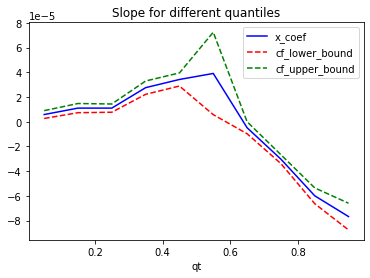

In [41]:
#Plot the changes in the quantile coeffiecients
plt.figure(6)
models.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
plt.show()

Linear regression works by selecting coefficients for each independent variable that minimizes a loss function. If the coefficients are too large, it can lead to model over-fitting on the training dataset and it will not generalize well on the unseen data. Next, we'll do regularization which penalizes large coefficients. Below are regularization algorithms used.

##Ridge Regression

Here the modification of the loss function in order to minimize the complexity of the model is done by adding a penalty parameter that is equivalent to the square of the magnitude of the coefficients.

In [42]:
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

144896.17259159865
0.4044039235343021
140896.36729038015
0.423783221191137


##Lasso Regression

In Lasso, the loss function is modified to minimize the complexity of the model by limiting the sum of the absolute values of the model coefficient

In [43]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

144896.1725915603
0.4044039235346173
140896.36435386405
0.42378324520978083


##Elastic Net Regression

Elastic Net Regression combines the properties of both Ridge and Lasso regression. Here, the R2 is the least of all models but by a very negligible margin. Hence it's the worst performing model


In [44]:
model_enet = ElasticNet(alpha = 0.01)
model_enet.fit(X_train, y_train) 
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

144897.82192961586
0.4043903642411174
140927.02250231648
0.42353245576086784


##Cross Validating the Model

In [45]:

folds = KFold(n_splits=5)

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 1 # This will just help 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1


KeyError: ignored

The RMSE for our first and fifth model is fairly larger than the other models while the third model's RMSE is way smaller compared to the other models and this could be because of the presence of outliers which the quantile method was not able to remove completely.


The below average RMSE  is close to the fourth and second model hence we could go with the fourth model as being most fitting.

In [ ]:
np.mean(RMSES)

In [46]:
from sklearn.model_selection import LeaveOneOut

folds = LeaveOneOut()

# note that if you have a KFold object, you can figure out how many folds you set up 
# for it using get_n_splits
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] # We will use this array to keep track of the RSME of each model
count = 0 # This will just help 
for train_index, test_index in folds.split(X):
  
  # set up the train and test based on the split determined by KFold
  # With 5 folds, we will end up with 80% of our data in the training set, and 20% in the test set, just as above
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
y_pred = regressor.predict(X_test)
  
rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
RMSES.append(rmse_value)
  
count = count + 1
print('trained ' + str(count) + ' models' )
np.mean(RMSES)

we are using 15787 folds


KeyError: ignored

The above indicates that it would be challenging to create a model that beats the ~0.05 average RMSE using this dataset. This is the benefit of using Leave One Out Cross validation: It gives us a sense of how best we can expect a given model to be using our dataset

#Conclusion

The Ridge model was the most successful of all because it yielded 42% accurate results while the Elastic Net model was the least performing amongst the models used although with a negligible margin compared to the rest.


Upon performing cross validation, I initially got values but afterwards after running the programme once again, I encountered errors.

#Challenging the Solution

The data we worked with had a few challenges as I was unable to validate the models fitted.


There are other iterations that can be done to improve model performance. We assigned the value of alpha to be 0.01, but this can be altered by hyper parameter tuning to arrive at the optimal alpha value.

Fitting the gridsearch in hyperparameter tuning is a challenge and takes a lot of time for the model to be evaluated.

